In [1]:
!pip install matplotlib
!pip install mplfinance

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
 
import tensorflow as tf
from tensorflow import keras
 
import copy
import time
from datetime import datetime 

tf.config.experimental.list_physical_devices(device_type='GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
# 讀取資料集
data = pd.read_csv('./Datasets/US_stocks_datasets/google.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
print(data.index.min(), data.index.max())
data.head()

2010-07-21 00:00:00 2017-11-10 00:00:00


Open    High     Low   Close  Volume  OpenInt
Date                                                       
2010-07-21  24.333  24.333  23.946  23.946   43321        0
2010-07-22  24.644  24.644  24.362  24.487   18031        0
2010-07-23  24.759  24.759  24.314  24.507    8897        0
2010-07-26  24.624  24.624  24.449  24.595   19443        0
2010-07-27  24.477  24.517  24.431  24.517    8456        0

In [3]:
data.tail()

Open     High      Low    Close  Volume  OpenInt
Date                                                         
2017-11-06  57.61  57.7372  57.2285  57.6500   41601        0
2017-11-07  57.29  57.3460  57.1446  57.2850   50935        0
2017-11-08  57.31  57.5500  57.2200  57.4900   71770        0
2017-11-09  57.23  57.2300  56.7100  56.9265   53130        0
2017-11-10  56.96  56.9600  56.3909  56.4000   29233        0

In [4]:
data.shape

(1565, 6)

In [5]:
# 切 train/test 資料集
date_split = '2016-01-01'
train = data[:date_split]
test = data[date_split:]
len(train), len(test)

(1117, 448)

In [6]:
class Env:
    def __init__(self, data, history_time=90):
        self.data = data # 股票的歷史資料
        self.history_time = history_time # 存放多少天的 state，預設爲 90 天
        self.reset()

    def reset(self):
        self.t = 0 # 時間點

        # History = [state_(-90days), state_(-89days), ...]
        # state 在此設計爲"今日收盤價與昨日收盤價的價差"
        self.history = [0 for _ in range(self.history_time)] # history reset 90 天的值都爲 0, history = [state_(-90days), state_(-89days), ...]

        self.profits = 0
        self.positions = [] # 收盤價(close)的資料
        self.position_value = 0 # 這是 profit
        self.done = False # 環境到達結束
        return [self.position_value] + self.history
  
    # env(環境)與 agent 的每一步互動，輸入參數為 agent 
    def step(self, act):
        reward = 0 # 每一步開始都先初始化 reward 為 0

        # action
        # 1 --> buy
        # 2 --> sell

        # 如果採取的策略為買入，則將收盤價放進 position 陣列內，就是你至今買入的成本
        if act == 1:
          # print("action: {}".format(act))
            ###################
            # 上機時間
            ###################
            self.positions 

        # 如果採取的策略為賣出，則計算獲利多少
        # reward 也是在賣出時才判定決策對不對
        # **說明** 賣出才是重點，決定你有沒有賺
        elif act == 2:
          # 如果沒有買入什麼，但卻判定要賣出，則給 reward = -1 的懲罰
          if len(self.positions) == 0:
            reward = -1

          # 先前有買入，開始計算這次清倉的獲利值
          else:
            profits = 0 # 初始獲利值
            ###################
            # 上機時間
            ###################
            for ... in ...:
                profits += (self.data.iloc[self.t, :]['Close'] - p) # 正的為賺，負的為賠

            ###################
            # 上機時間
            ###################
            reward += ...
            self.profits += profits
            self.positions = [] # 賣出後清空
  
        # 下一個 step
        self.t += 1 # 每個 step 後再加往後一日
        self.position_value = 0 # profit
        for p in self.positions:
            self.position_value += (self.data.iloc[self.t, :]['Close'] - p)
        self.history.pop(0) # 把 history 的第一個（最一開始)的 state 給 popout, [0, 1, 2] --> [1 , 2]
        self.history.append(self.data.iloc[self.t, :]['Close'] - self.data.iloc[self.t-1, :]['Close']) # 存入 state，爲今昨的收盤價價差

        # reward clipping
        # 這裡可以再優化 r > 0 的部份，好比獲利多少要給多少 reward
        ###################
        # 上機時間
        ###################
        if reward  :
            reward = 1
        elif reward  :
            reward = -1
    
        return [self.position_value] + self.history, reward, self.done

In [7]:
env = Env(train)
env.reset()
for _ in range(3):
    pact = np.random.randint(3)
    print(env.step(pact))

([0.5410000000000004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5410000000000004], 0, False)
([0.5609999999999999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5410000000000004, 0.019999999999999574], 0, False)
([0.6490000000000009, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5410000000000004, 0.019999999999999574, 0.08800000000000

In [8]:
# Deep Q-Learning Network
# 模型在此採用 subclassing 寫法，也可以用 Sequential 或 Function API 寫法
class DQN(keras.models.Model):
    def __init__(self, hidden_sz, output_sz):
        super(DQN, self).__init__()
        ###################
        # 上機時間
        ###################
        self.fc1 = ...
        self.fc2 = ...
        self.fc3 = keras.layers.Dense(output_sz)
    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        outputs = self.fc3(x)
        return outputs

In [9]:
# Hyperparameters
epochs = 50
batch_sz = 20

# RL Hyperparameters
epsilon = 1.0 # epsilon-greedy
epsilon_decrease = 1e-3
epsilon_min = 0.1
start_reduce_epsilon = 200
terminal_step = len(env.data) - 1 # 資料最後一筆
step_count = 0
discount_factor = 0.98
train_freq = 10
update_freq = 20
memory = [] # ()
memory_sz = 200 # memory 最長爲 200
total_rewards = [] # 圖形化結果用
total_losses = [] # 圖形化結果用
show_log_freq = 5

# Loss & Optimizer
loss_fn = keras.losses.MeanSquaredError()
optimizer = keras.optimizers.Adam(lr=1e-3)

# Init model
eval_network = DQN(hidden_sz=100, output_sz=3) # evaluation network
target_network = copy.deepcopy(eval_network) # target network

In [11]:
# Training
start = datetime.now()
for epoch in range(epochs):

    # init
    prev_history = env.reset()
    step = 0
    done = False

    total_reward = 0 # 每一個 epoch 結束的總 reward
    total_loss = 0 # 每一個 epoch 結束的總 loss

    while not done and step < terminal_step: # 一直執行到最後一步

        # 選擇 action
        ###################
        # 上機時間
        ###################
        if ...:
            q_value = eval_network(np.array(prev_history, dtype=np.float32).reshape(1, -1))
            action = np.argmax(q_value)
        else:
            action = np.random.randint(3) # 隨機選動作

        # do action
        history, reward, done = env.step(action)

        # add memory
        memory.append((prev_history, action, reward, history, done))
        if len(memory) > memory_sz: # 保持 memory size 長度
            ###################
            # 上機時間
            ###################
            ...

        # Training 和 Update Q 值
        if len(memory) == memory_sz: # 當 memory 累積到 200 個才開始訓練
            # training
            if step_count % train_freq == 0: # 當步數爲 train_freq 的倍數時，才去訓練 Q
                shuffled_memory = np.random.permutation(memory) # 將訓練集(memory)打散
                memory_idx = range(len(shuffled_memory))

                for i in memory_idx[::batch_sz]: # (start=0, end=200, step=20)
                    batch = np.array(shuffled_memory[i: i+batch_sz]) # 最後一個 batch 將不會是剛好的 batch_sz
                    batch_prev_history = np.array(batch[:, 0].tolist(), dtype=np.float32).reshape(batch_sz, -1) # 取出一個 batch 裡的 previous history
                    batch_prev_action = np.array(batch[:, 1].tolist(), dtype=np.int32) # 取出一個 batch 裡的 action
                    batch_reward = np.array(batch[:, 2].tolist(), dtype=np.int32) # 取出一個 batch 裡的 reward
                    batch_history = np.array(batch[:, 3].tolist(), dtype=np.float32).reshape(batch_sz, -1) # 取出一個 batch 裡的 history
                    batch_done = np.array(batch[:, 4].tolist(), dtype=np.bool) # 取出一個 batch 裡的 done (是否回合結束了)

                    with tf.GradientTape() as tape:
                        # 計算 eval Q （預估Q值）
                        ###################
                        # 上機時間 (難)
                        ###################
                        eval_q = ... # 將 batch_prev_history 丟給 model 去算 q_pred
                        max_eval_q = ... # 求出最大的 q 值作爲 q_pred
                        
                        # 透過公式求 target Q（真實Q值）
                        target_q_value = copy.deepcopy(eval_q.numpy())
                        for j in range(batch_sz):
                            # Q_target = reward + discount_factor*max_q
                            target_q_value[j, batch_prev_action[j]] = batch_reward[j] + discount_factor*max_eval_q[j]*(not batch_done[j])
                            
                        # 求 loss
                        ###################
                        # 上機時間 (難)
                        ###################
                        loss = loss_fn(...)
                        total_loss += loss.numpy()
                        
                    # 反向傳播回去更新網路參數
                    ###################
                    # 上機時間 (難)
                    ###################
                    grads = tape.gradient(..., eval_network.trainable_weights)
                    optimizer.apply_gradients(zip(grads, eval_network.trainable_weights))

            # updating
            if step_count % update_freq == 0:
                target_network = copy.deepcopy(eval_network)

        # 減少隨機性
        if epsilon > epsilon_min and step_count > start_reduce_epsilon:
            epsilon -= epsilon_decrease

        # next step
        step += 1
        step_count += 1
        total_reward += reward
        prev_history = history

    # 圖示化模型訓練情況
    total_rewards.append(total_reward)
    total_losses.append(total_loss)

    # Log
    if (epoch+1) % show_log_freq == 0:
        log_reward = sum(total_rewards[((epoch+1)-show_log_freq):])/show_log_freq
        log_loss = sum(total_losses[((epoch+1)-show_log_freq):])/show_log_freq
        elapsed_time = datetime.now()-start
        print("Epoch: {}, Epsilon: {}, Total steps: {}, Reward: {}, Loss: {}, Elapsed time: {}".format(epoch+1, epsilon, step_count, log_reward, log_loss, elapsed_time))
        start = datetime.now()

Epoch: 5, Epsilon: 0.0999999999999992, Total steps: 5780, Reward: 26.6, Loss: 51.534212804673004, Elapsed time: 0:01:18.079370
Epoch: 10, Epsilon: 0.0999999999999992, Total steps: 11360, Reward: 70.0, Loss: 15.953998020743892, Elapsed time: 0:01:15.717415
Epoch: 15, Epsilon: 0.0999999999999992, Total steps: 16940, Reward: 72.4, Loss: 12.798072212332045, Elapsed time: 0:01:13.481170
Epoch: 20, Epsilon: 0.0999999999999992, Total steps: 22520, Reward: 99.8, Loss: 70.49726966309645, Elapsed time: 0:01:14.947265
Epoch: 25, Epsilon: 0.0999999999999992, Total steps: 28100, Reward: 121.8, Loss: 14.745259422853996, Elapsed time: 0:01:15.354511
Epoch: 30, Epsilon: 0.0999999999999992, Total steps: 33680, Reward: 119.0, Loss: 10.42725222127665, Elapsed time: 0:01:14.621044
Epoch: 35, Epsilon: 0.0999999999999992, Total steps: 39260, Reward: 122.2, Loss: 10.007787651768012, Elapsed time: 0:01:14.302369
Epoch: 40, Epsilon: 0.0999999999999992, Total steps: 44840, Reward: 115.2, Loss: 7.531135600408925

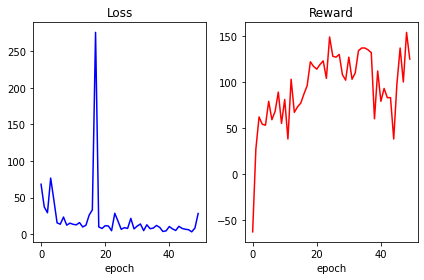

In [12]:
# 圖示化模型訓練情況
def plot_loss_reward(total_losses, total_rewards):
    plt.subplot(1,2,1)
    plt.plot(total_losses, 'blue')
    plt.xlabel('epoch')
    plt.title('Loss')
    plt.subplot(1,2,2)
    plt.plot(total_rewards, 'red')
    plt.xlabel('epoch')
    plt.title('Reward')
    plt.tight_layout()
    plt.show()

plot_loss_reward(total_losses, total_rewards)

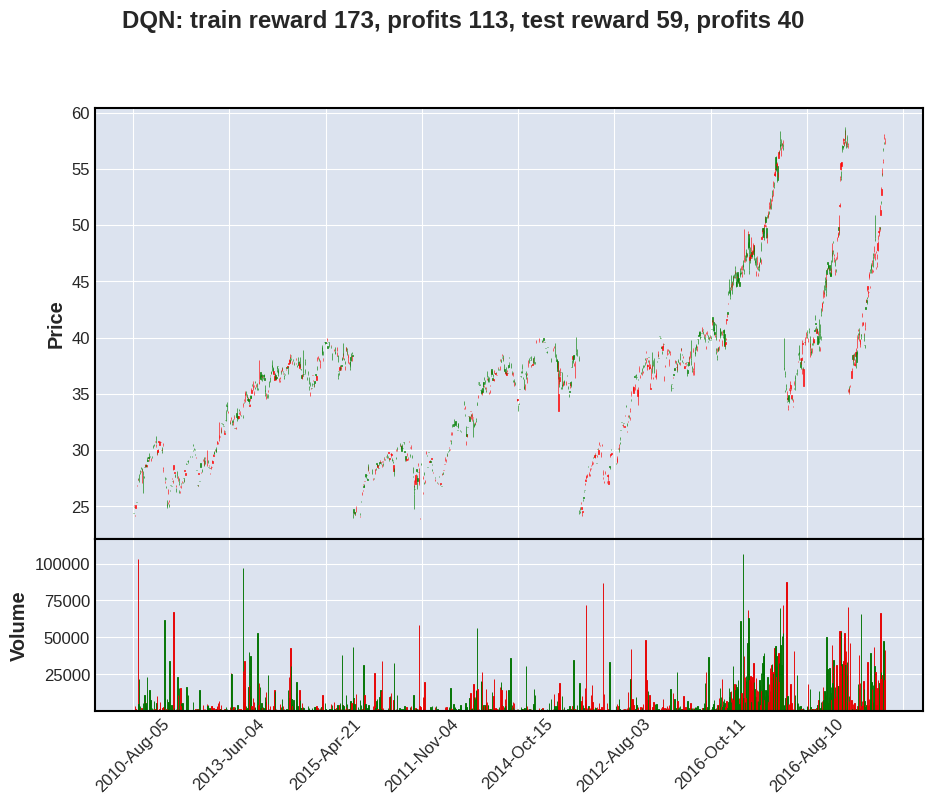

In [13]:
def plot_train_test_by_q(train_env, test_env, Q, algorithm_name):
    
    # train
    prev_history = train_env.reset()
    train_acts = []
    train_rewards = []
    
    for _ in range(len(train_env.data) -1):
        
        prev_action = Q(np.array(prev_history, dtype=np.float32).reshape(1, -1))
        prev_action = np.argmax(prev_action)
        train_acts.append(prev_action)
        
        history, reward, done = train_env.step(prev_action)
        train_rewards.append(reward)
        
        prev_history = history
        
    train_profits = train_env.profits
#     print(train_profits)
    
    # test
    prev_history = test_env.reset()
    test_acts = []
    test_rewards = []
    
    for _ in range(len(test_env.data) -1):
        
        prev_action = Q(np.array(prev_history, dtype=np.float32).reshape(1, -1))
        prev_action = np.argmax(prev_action)
        test_acts.append(prev_action)
        
        history, reward, done = test_env.step(prev_action)
        test_rewards.append(reward)
        
        prev_history = history
        
    test_profits = test_env.profits
#     print(test_profits)
    
    # plot
    train_copy = train_env.data.copy()
    test_copy = test_env.data.copy()
    train_copy['act'] = train_acts + [np.nan]
    train_copy['reward'] = train_rewards + [np.nan]
    test_copy['act'] = test_acts + [np.nan]
    test_copy['reward'] = test_rewards + [np.nan]
    train0 = train_copy[train_copy['act'] == 0]
    train1 = train_copy[train_copy['act'] == 1]
    train2 = train_copy[train_copy['act'] == 2]
    test0 = test_copy[test_copy['act'] == 0]
    test1 = test_copy[test_copy['act'] == 1]
    test2 = test_copy[test_copy['act'] == 2]
    
    mc = mpf.make_marketcolors(up='r', down='g', inherit=True)
    s  = mpf.make_mpf_style(base_mpf_style='default', marketcolors=mc)
    title = '{}: train reward {}, profits {}, test reward {}, profits {}'.format(
        algorithm_name,
        int(sum(train_rewards)),
        int(train_profits),
        int(sum(test_rewards)),
        int(test_profits)
    )
    kwargs = dict(type='candle', volume=True, title=title, style=s, figscale=1.5, figratio=(12,9))
    data = pd.concat([train0, train1, train2, test0, test1, test2])
    mpf.plot(data, **kwargs)
#     print(train_copy)
#     print(test_copy)
    return train_copy, test_copy

train_, test_ = plot_train_test_by_q(Env(train), Env(test), target_network, 'DQN')

In [14]:
train_.iloc[90:100,:]

Open    High     Low   Close  Volume  OpenInt  act  reward
Date                                                                    
2010-11-30  27.514  27.514  27.436  27.436    1856        0  1.0     0.0
2010-12-01  27.698  27.903  27.698  27.903    1683        0  2.0     1.0
2010-12-02  27.903  28.348  27.903  28.308   26077        0  1.0     0.0
2010-12-03  28.268  28.358  28.268  28.318    4593        0  1.0     0.0
2010-12-06  28.135  28.378  28.135  28.378    2253        0  2.0     1.0
2010-12-07  28.540  28.540  28.473  28.473   10730        0  0.0     0.0
2010-12-08  28.443  28.443  28.212  28.298    2238        0  1.0     0.0
2010-12-09  28.298  28.298  28.298  28.298     370        0  1.0     0.0
2010-12-10  28.338  28.453  28.338  28.443    2114        0  2.0     1.0
2010-12-13  28.540  28.736  28.540  28.628    6087        0  0.0     0.0